In [1]:
import plot as pl
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Global seed set to 0


In [2]:
palette=sns.color_palette("hls")

In [3]:
def bar_proportions(proportions_df):
    fig, ax = plt.subplots(figsize=(len(proportions_df.index) * 0.4, 10), dpi=100)

    proportions_df.plot(kind="bar", stacked=True, ax=ax, color=palette, width=0.8, alpha=1.0)

    plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=proportions_df.columns)
    ax.grid(False)
    
    # return ax.containers
    for bars in ax.containers:
        labels = []
        for val in bars.datavalues:
            if val > 0.01:
                labels.append(f"{val*100:.0f}%")
            else:
                labels.append("")
        ax.bar_label(bars, labels=labels, label_type="center", fontsize=8, alpha=0.8)


    plt.show()

In [4]:
df1 = pd.read_csv("../../data/music/est.csv", sep="\t", index_col=0, usecols=[0,6,7,8,9,10,11])
df2 = pd.read_csv("../../out/20220830-125306/prob/proportions.csv", sep=",", index_col=0)

In [6]:
df1 = df1.reindex(sorted(df1.columns), axis=1)
df2 = df2.reindex(sorted(df2.columns), axis=1)
df2 = df2[df2.index.isin(df1.index)]

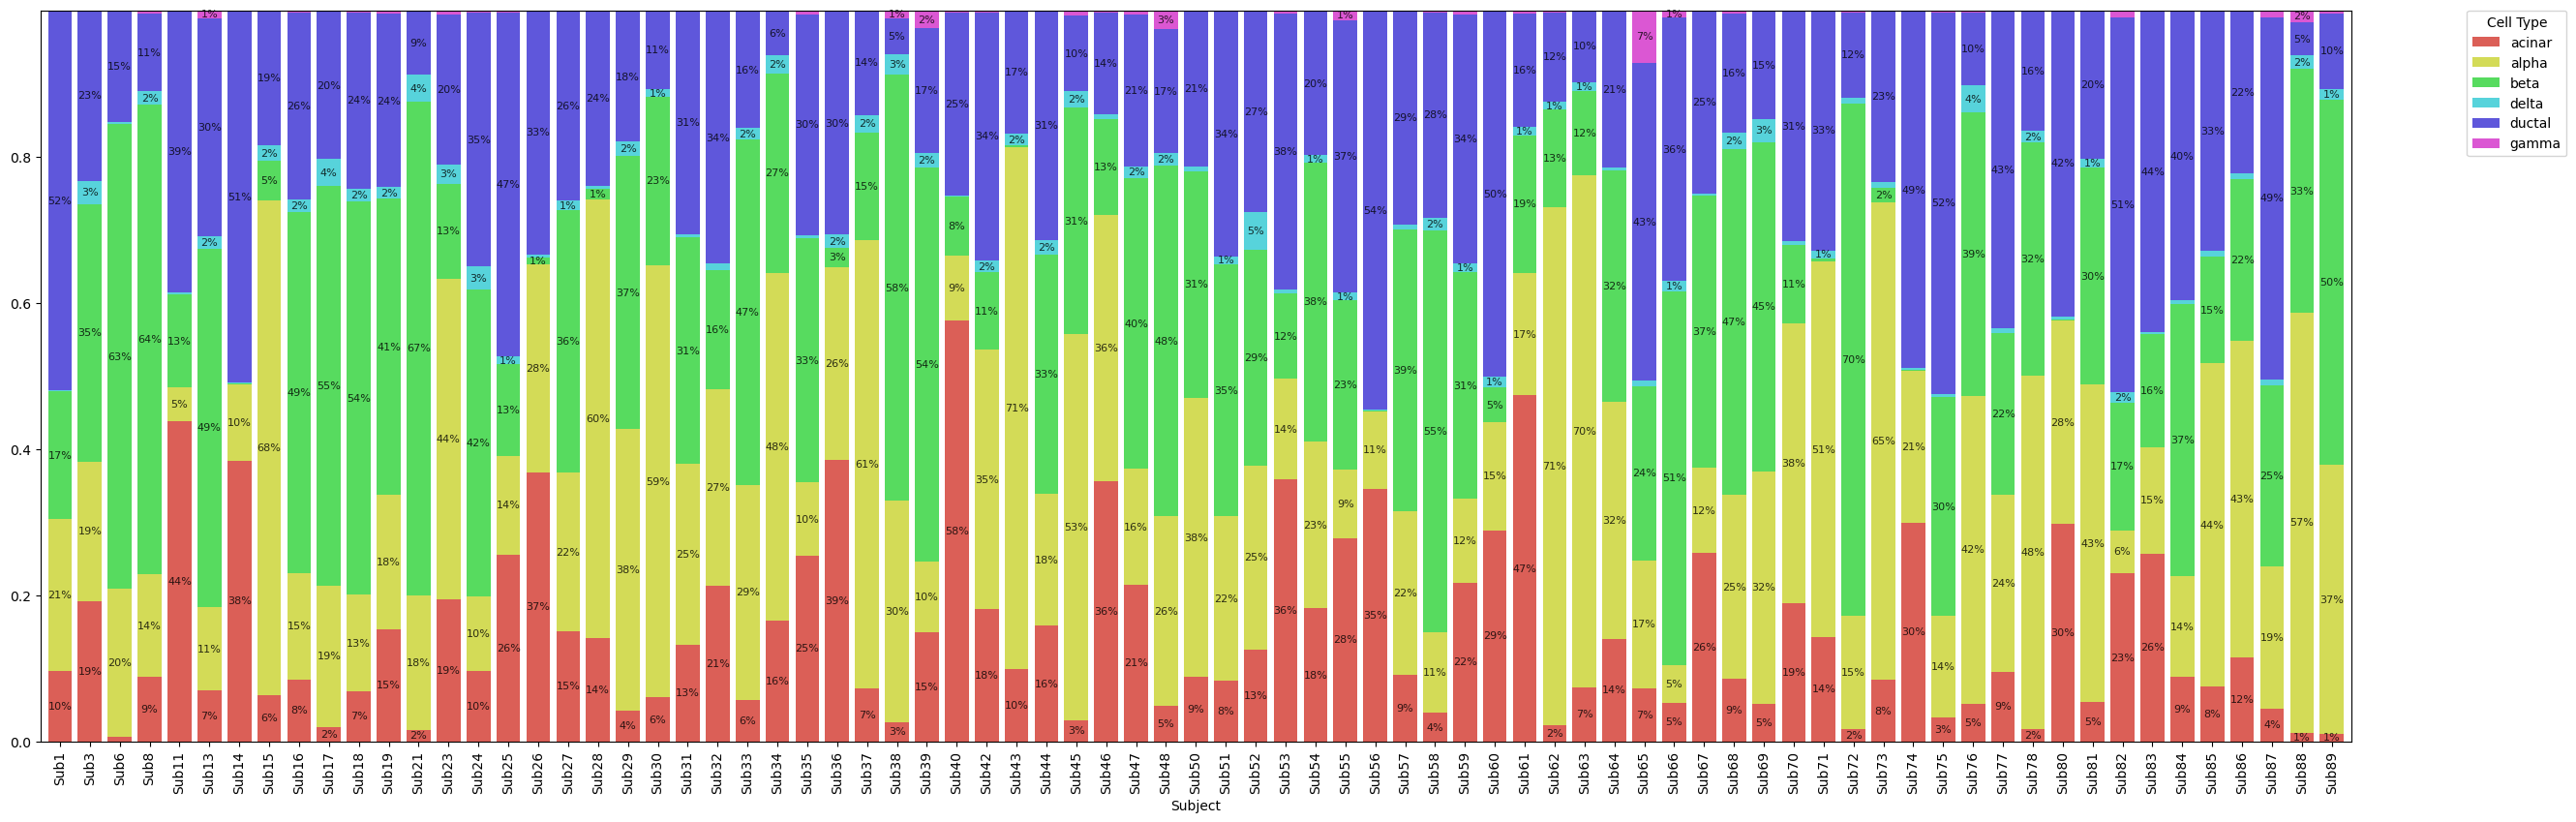

In [ ]:
bar_proportions(df1)

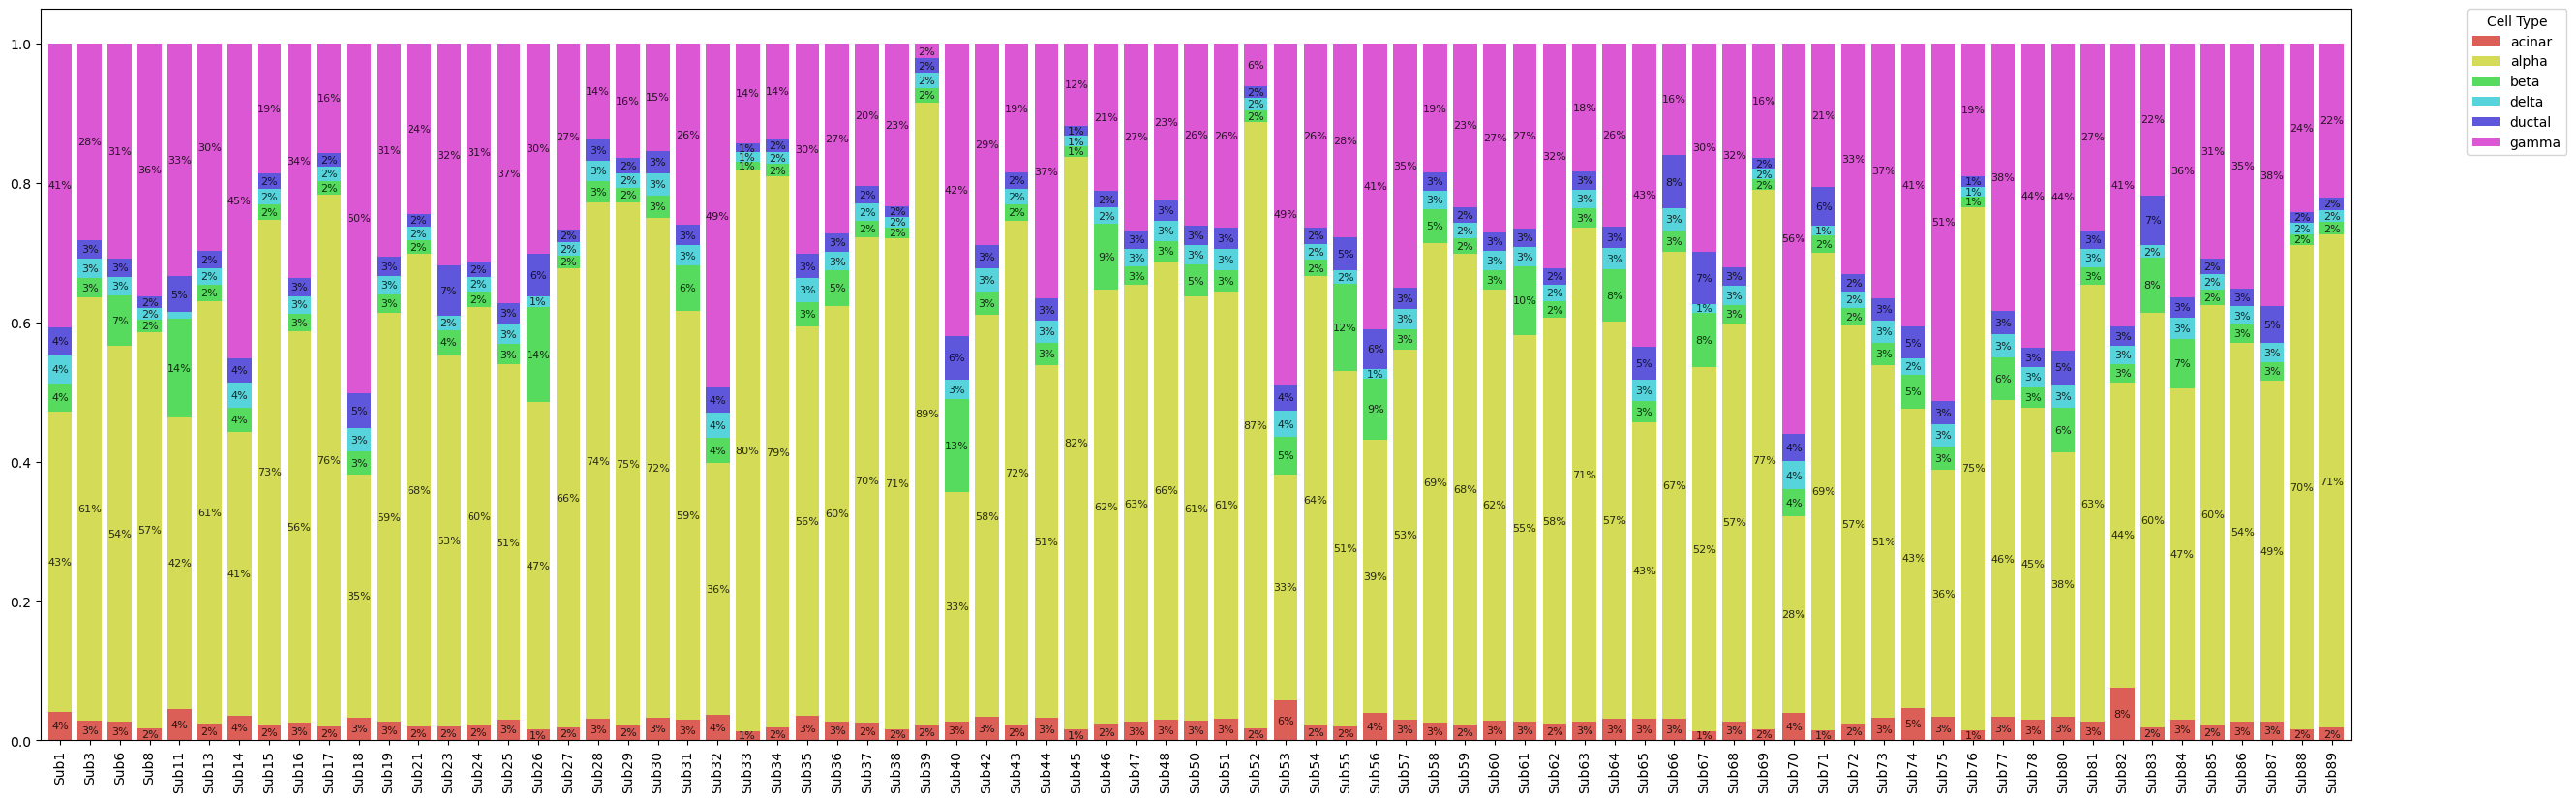

In [ ]:
bar_proportions(df2)

In [ ]:
corr = pd.concat([df1, df2], axis=1).corr().iloc[:6, 6:]
corr.style.background_gradient(cmap='coolwarm')

,acinar,alpha,beta,delta,ductal,gamma
acinar,0.313058,-0.440729,0.690900,0.036152,0.439562,0.270610
alpha,-0.266098,0.369179,-0.310514,-0.075751,-0.274536,-0.309956
beta,-0.328168,0.334133,-0.335201,-0.182009,-0.357583,-0.235364
delta,-0.401431,0.597643,-0.507966,-0.368783,-0.460332,-0.485088
ductal,0.563930,-0.606781,0.290526,0.355264,0.497150,0.537105
gamma,0.020572,-0.019920,-0.091311,0.035284,0.081590,0.034536


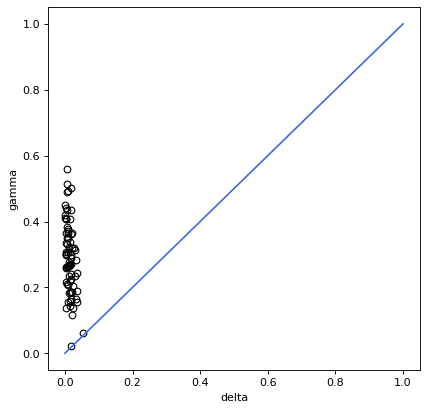

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(6,6), dpi=80)
sns.scatterplot(x=df1["delta"], y=df2["gamma"], edgecolor=(0,0,0,1), color=(1,1,1,0), ax=ax, linewidth=1)
ax.plot([0, 1], [0, 1], label="y=x", c="royalblue")
plt.show()

In [30]:
def proportions_heatmap(df):
    f, ax = plt.subplots(1, 1, figsize=(8, df.shape[0] * 0.2), dpi=100)
    sns.heatmap(df, xticklabels=df.columns, yticklabels=df.index, annot=True, ax=ax, cmap="bwr", vmin=0, vmax=1)
    plt.show()

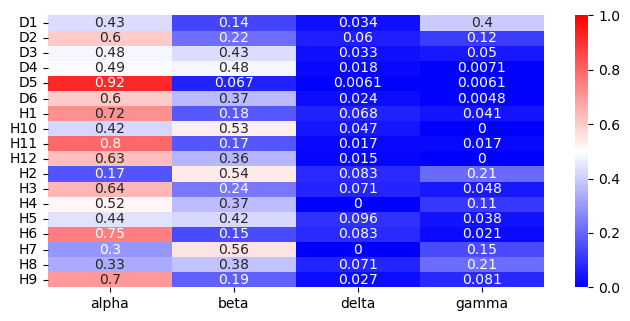

In [31]:
df1 = pd.read_csv("../../data/xin/true.tsv", sep="\t", index_col=0)
df1.sort_index(inplace=True)
proportions_heatmap(df1)

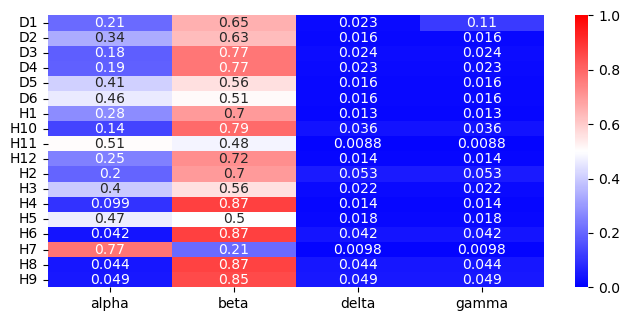

In [32]:
proportions_heatmap(df2)

In [33]:
df2 = pd.read_csv("../../out/20220830-142704/prob/proportions.csv", sep=",", index_col=0)
df2.sort_index(inplace=True)